<a href="https://colab.research.google.com/github/UrielMendoza/Curso-RV-python/blob/master/Jueves_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Georreferencia y reproyeccion de datos vectoriales

**Geopandas**

Instalación

In [2]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.9MB/s 
     |████████████████████████████████| 11.8MB 16.5MB/s 
     |████████████████████████████████| 10.1MB 41.9MB/s 


Apertura

In [0]:
import geopandas as gpd
df = gpd.read_file('/content/drive/My Drive/Curso-RV-python/hidro4mgw_c/hidro4mcw.shp')

Graficación

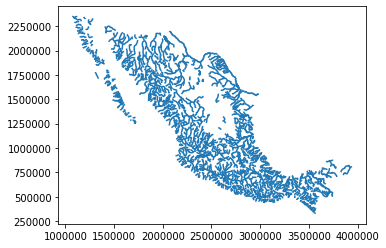

In [21]:
df.plot()

Reproyección

In [22]:
df.crs

{'datum': 'WGS84',
 'lat_0': 12,
 'lat_1': 17.5,
 'lat_2': 29.5,
 'lon_0': -102,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 2500000,
 'y_0': 0}

In [23]:
df.geometry

0       LINESTRING (2067557.423 2197112.287, 2071730.7...
1       LINESTRING (2071730.751 2192639.254, 2074894.9...
2       LINESTRING (2074894.943 2195062.388, 2078077.9...
3       LINESTRING (2078077.985 2194784.597, 2082127.5...
4       LINESTRING (2082127.527 2190850.698, 2093579.3...
                              ...                        
2229    LINESTRING (1608371.196 1347645.419, 1611178.8...
2230    LINESTRING (1622633.847 1328556.486, 1623296.4...
2231    LINESTRING (1691865.531 1286811.247, 1691842.5...
2232    LINESTRING (1691842.501 1286812.781, 1688298.1...
2233    LINESTRING (1717172.219 1245742.299, 1717030.0...
Name: geometry, Length: 2234, dtype: geometry

In [30]:
dfGeo = df.to_crs({'init':'epsg:4326'})
dfMer = df.to_crs({'init':'epsg:3857'})
dfUTM = df.to_crs({'init':'epsg:32614'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Graficación

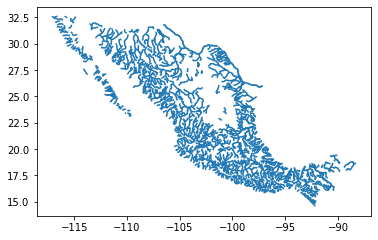

In [25]:
dfGeo.plot()

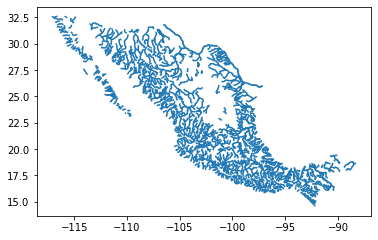

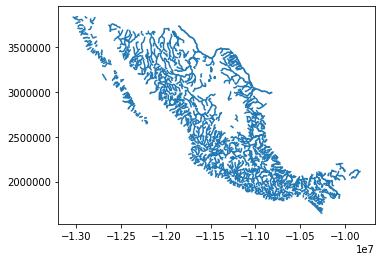

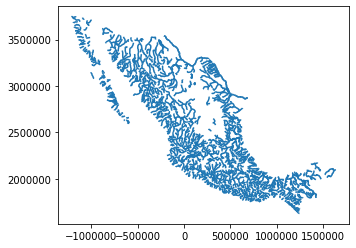

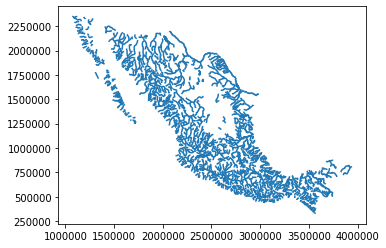

In [31]:
dfGeo.plot()
dfMer.plot()
dfUTM.plot()
df.plot()

Coordenadas

In [29]:
dfGeo.geometry

0       LINESTRING (-106.54331 31.78176, -106.49802 31...
1       LINESTRING (-106.49802 31.74282, -106.46560 31...
2       LINESTRING (-106.46560 31.76544, -106.43209 31...
3       LINESTRING (-106.43209 31.76383, -106.38832 31...
4       LINESTRING (-106.38832 31.72966, -106.26068 31...
                              ...                        
2229    LINESTRING (-110.81049 23.91674, -110.78537 23...
2230    LINESTRING (-110.65853 23.75165, -110.65354 23...
2231    LINESTRING (-109.95394 23.40968, -109.95417 23...
2232    LINESTRING (-109.95417 23.40968, -109.98911 23...
2233    LINESTRING (-109.68371 23.04989, -109.68638 23...
Name: geometry, Length: 2234, dtype: geometry

### PyProj

Interfaz de Python para PROJ (biblioteca de proyecciones cartográficas y transformaciones de coordenadas)

Importación

In [0]:
from pyproj import Proj,transform

Definicion PROJ

+proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs

In [93]:
p1 = Proj('EPSG:4326')
p2 = Proj('+proj=ortho +lat_0=0 +lon_0=-99 +x_0=0 +y_0=0 +a=6370997 +f=0 +units=m +no_defs')
type(p2)

pyproj.proj.Proj

Reproyeccion

In [94]:
transform(p2,p1,-99,19) 

(0.00017087118558526678, -99.00089032880913)

Reproyeccion multiple

Extraccion de coordenadas

In [95]:
x = []
y = []
for i in dfGeo['geometry']:
  for j in i.xy[0]:
    print(j)
    x.append(j)
  for j in i.xy[1]:
    print(j)
    y.append(j)

-106.54330723000729
-106.49801712304445
31.781755555503214
31.742817675748334
-106.49801712304445
-106.46559802313791
31.742817675748334
31.765438297475736
-106.46559802313791
-106.43209235804015
31.765438297475736
31.76383265607833
-106.43209235804015
-106.38831648938815
31.76383265607833
31.729664913447625
-106.38831648938815
-106.26068140644391
31.729664913447625
31.518579740411646
-106.26068140644391
-106.12477368747051
31.518579740411646
31.41491715601288
-106.12477368747051
-106.06532801218712
31.41491715601288
31.391914453827297
-106.06532801218712
-105.96545136244654
31.391914453827297
31.394911737333626
-105.96545136244654
-105.94186168153395
31.394911737333626
31.371334731370627
-105.94186168153395
-105.9403680931571
31.371334731370627
31.334148299315054
-105.9403680931571
-105.94824521505106
31.334148299315054
31.32690347312232
-105.94824521505106
-105.91482260284289
31.32690347312232
31.324105916585996
-105.91482260284289
-105.85459956195638
31.324105916585996
31.2794632815

In [96]:
x
y

[31.781755555503214,
 31.742817675748334,
 31.742817675748334,
 31.765438297475736,
 31.765438297475736,
 31.76383265607833,
 31.76383265607833,
 31.729664913447625,
 31.729664913447625,
 31.518579740411646,
 31.518579740411646,
 31.41491715601288,
 31.41491715601288,
 31.391914453827297,
 31.391914453827297,
 31.394911737333626,
 31.394911737333626,
 31.371334731370627,
 31.371334731370627,
 31.334148299315054,
 31.334148299315054,
 31.32690347312232,
 31.32690347312232,
 31.324105916585996,
 31.324105916585996,
 31.279463281503176,
 31.279463281503176,
 31.220725691112087,
 31.220725691112087,
 31.146903230646334,
 31.146903230646334,
 31.130804344853086,
 31.130804344853086,
 31.110865443786352,
 31.110865443786352,
 31.083448359360677,
 31.083448359360677,
 31.00519682843226,
 31.00519682843226,
 30.890666094094904,
 30.890666094094904,
 30.837508894896065,
 30.837508894896065,
 30.815139767262195,
 30.815139767262195,
 30.830185785435862,
 30.830185785435862,
 30.82715293533144,
 

In [97]:
x_aeqd,y_aeqd = transform(p2,p1,x,y)
x_aeqd

[0.000285820329040234,
 0.0002854701521098148,
 0.0002854701521098148,
 0.00028567358434419793,
 0.00028567358434419793,
 0.00028565914445739777,
 0.00028565914445739777,
 0.00028535186642096914,
 0.00028535186642096914,
 0.00028345353095904705,
 0.00028345353095904705,
 0.0002825212705012975,
 0.0002825212705012975,
 0.000282314402133184,
 0.000282314402133184,
 0.00028234135736404013,
 0.00028234135736404013,
 0.0002821293241555406,
 0.0002821293241555406,
 0.00028179489838011485,
 0.00028179489838011485,
 0.0002817297440621715,
 0.0002817297440621715,
 0.0002817045850199552,
 0.0002817045850199552,
 0.0002813031039681482,
 0.0002813031039681482,
 0.00028077486387821914,
 0.00028077486387821914,
 0.0002801109622286014,
 0.0002801109622286014,
 0.00027996618140217386,
 0.00027996618140217386,
 0.00027978686647245934,
 0.00027978686647245934,
 0.0002795402985923985,
 0.0002795402985923985,
 0.00027883656533641226,
 0.00027883656533641226,
 0.0002778065652120766,
 0.0002778065652120766,

Graficación

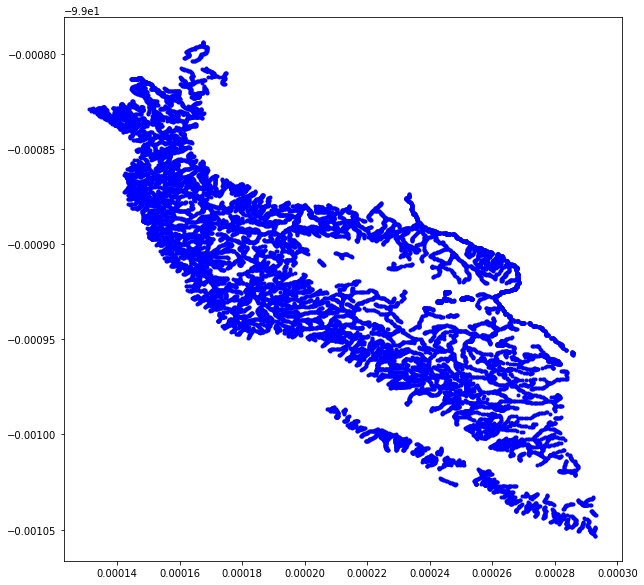

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x_aeqd,y_aeqd,'b.')
